<h1><center>Laboratorio 5: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza y Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano y Angelo Muñoz

### Estudiante:

- Mario González Otero

### **Link de repositorio de GitHub:** [ENLACE](https://www.github.com/mgzotero/MDS7202)

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- **Grupos de máximo 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manipular datos tabulares.
- Utilizar `plotly` para obtener información gráfica del dataset.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [129]:
# Libreria Core del lab.
import numpy as np
import pandas as pd 

from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades.csv```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [130]:
# # Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except: 
#     print('Ignorando conexión drive-colab')

# 1. Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente). 

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`. 


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos. 

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

In [131]:
df_grades = pd.concat(
    [pd.read_json("students_grades_1.json"), pd.read_json("students_grades_2.json")],
    axis=0,
)

df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


Resultado esperado:

In [132]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## Análisis de Las Notas v2 [0.5 Cada gráfico + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta: 

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.


In [133]:
df_melt = (df_grades[["math score", "reading score", "writing score"]]
           .melt()
           .rename({"variable": "subject", "value": "grade"}, axis=1))

**Gráfico de Caja:**

In [135]:
px.box(df_melt,
       y="grade",
       color="subject")

**Distplot:**

In [136]:
ff.create_distplot(
    df_grades[['math score', 'reading score', 'writing score']].values.T,
    group_labels=["math Score", "reading Score", "writing Score"],
    bin_size=10,
    show_rug=False,
    show_hist=False
)


**Histograma con Boxplots:**

In [137]:
px.histogram(
    df_melt,
    x="grade",
    color="subject",
    marginal="box",
    barmode="group",
    nbins=30
)

**Histograma con Faceta:**

In [138]:
px.histogram(
    df_melt,
    x="grade",
    color="subject",
    facet_row="subject",
    nbins=30
)

**Justifique:**

```
1. ¿Existe una diferencia notable entre las notas?
```
R: Es posible observar gracias a los gráficos de caja, que la mediana de las distribuciones es levemente distinta cuando se comparan por materia (siguiendo un orden de lectura > escritura > matemáticas), aunque esta diferencia no es lo suficiente grande como para considerar que las notas son distintas. Por otro lado, en el histograma con faceta, se puede observar que las distribuciones son muy similares, por lo que se puede concluir que las notas no son distintas de manera sistemática.

```
2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.
```
R: La complejidad del gráfico a mostrar depende de la audiencia. Para el rector, se puede mostrar el gráfico de caja, ya que es un gráfico simple de interpretar y que permite observar la distribución de las notas de manera clara. Para los padres, se puede mostrar el histograma con faceta, ya que permite observar la distribución de las notas de manera clara y además permite comparar las notas de los distintos ramos. Para un centro de estudios educativos, se puede mostrar el histograma con boxplots, ya que permite observar la distribución de las notas de manera clara y además permite comparar las notas de los distintos ramos.

## Análisis por Nivel Educacional Etnia de los Padres [1.5 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos. 
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### Tabla de Resumen

Para generar la tabla de resumen:

- [X] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [X] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión: 

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas. 
- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [X] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'. 


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

### 1.3.4 Información por Categorías [1 punto]

In [142]:
educ_simple = {
    "some high school": "school",
    "some college": "school",
    "high school": "school",
    "bachelor's degree": "college",
    "associate's degree": "college",
    "master's degree": "postgraduate"
}

df_grades["simple parental level of education"] = df_grades[
    "parental level of education"
].map(educ_simple)

total_students = df_grades.names.unique().shape[0]

df_grades["GPA"] = np.mean(
    df_grades[["math score", "reading score", "writing score"]], axis=1
)

table = round(
    df_grades.groupby(["race/ethnicity", "simple parental level of education"]).agg(
        {
            "math score": "mean",
            "reading score": "mean",
            "writing score": "mean",
            "GPA": "mean",
            "names": "count",
        }
    ).rename(
        columns={"names": "count"}
    ),
    2,
)

table["percentage"] = round(table["count"] / total_students * 100, 2).astype(str) + " %"

In [143]:
table

math score  reading score  \
race/ethnicity simple parental level of education                              
group A        college                                   4.74           5.00   
               postgraduate                              4.69           5.23   
               school                                    4.57           4.73   
group B        college                                   5.07           5.26   
               postgraduate                              4.91           5.69   
               school                                    4.69           4.89   
group C        college                                   5.02           5.37   
               postgraduate                              4.92           5.14   
               school                                    4.76           5.02   
group D        college                                   5.11           5.25   
               postgraduate                              5.22           5.54   
               school                                    5.02           5.13   
group E        college                                   5.54           5.45   
               postgraduate                              5.54           6.03   
               school                                    5.40           5.31   

                                                   writing score   GPA  count  \
race/ethnicity simple parental level of education                               
group A        college                                      4.89  4.88     24   
               postgraduate                                 5.35  5.09      2   
               school                                       4.56  4.62     51   
group B        college                                      5.19  5.18     54   
               postgraduate                                 5.55  5.38      5   
               school                                       4.76  4.78    107   
group C        college                                      5.35  5.25    102   
               postgraduate                                 5.10  5.06     15   
               school                                       4.92  4.90    155   
group D        college                                      5.25  5.20     70   
               postgraduate                                 5.73  5.50     20   
               school                                       5.11  5.09    149   
group E        college                                      5.45  5.48     52   
               postgraduate                                 5.89  5.82      6   
               school                                       5.16  5.29     63   

                                                  percentage  
race/ethnicity simple parental level of education             
group A        college                                2.74 %  
               postgraduate                           0.23 %  
               school                                 5.83 %  
group B        college                                6.17 %  
               postgraduate                           0.57 %  
               school                                12.23 %  
group C        college                               11.66 %  
               postgraduate                           1.71 %  
               school                                17.71 %  
group D        college                                 8.0 %  
               postgraduate                           2.29 %  
               school                                17.03 %  
group E        college                                5.94 %  
               postgraduate                           0.69 %  
               school                                  7.2 %

**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

In [165]:
px.box(
    df_grades[["GPA", "race/ethnicity", "simple parental level of education"]],
    x="simple parental level of education",
    y="GPA",
    color="race/ethnicity",
)

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

```
1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
```
R: Al analizar a través del nivel educacional sí es posible observar una muy leve subida de las medianas de GPA para los distintos grupos étnicos, además de irse reduciendo la varianza al ir observando niveles educacionales más altos (e.g. véase la evolución del grupo A). Al analizar a través de los grupos étnicos sí es posible observar diferencias en las medianas de GPA, siendo el grupo E el que presenta las notas más altas y el grupo A el que presenta las notas más bajas.

```
1. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?
```
R: Sí permite hacer un análisis conjunto de las dos variables, aunque quizás no de manera tan sencilla, ya que es necesario observar el gráfico con detención para poder observar las diferencias entre los niveles educacionales.

# 1.3.5 Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias. 
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.
 
 
El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`). 


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**


- [X] Cargar el `other_grades.csv`
- [X] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [X] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

> **Respuesta**: 


In [166]:
other_grades = pd.read_csv("other_grades.csv")

In [189]:
df_grades.shape[0], other_grades.shape[0]

(875, 1000)

In [177]:
outer_merge = df_grades.merge(other_grades, on="names", how="outer")
outer_merge

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Leona Markow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,3.8
996,Maxine Gulbranson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,3.9
997,Jeane Budds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,3.9
998,Nancy Ramos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,6.2


In [192]:
outer_merge.isna().sum()

names                                   0
gender                                125
race/ethnicity                        125
parental level of education           125
lunch                                 125
test preparation course               125
math score                            125
reading score                         125
writing score                         125
GPA                                   125
simple parental level of education    125
science score                           0
history score                           0
dtype: int64

El outer join es un tipo de join que une los dos dataframes, pero que no elimina los valores que no se encuentran en ambos dataframes, pero con valores nulos en las columnas que no se encuentran en ambos dataframes (e.g. estudiantes que tienen puntajes en historia y/o ciencias pero que no los tienen en matematicas, lectura y/o escritura se concatenan al final de la tabla rellenando con nulos aquellas columnas sin datos y viceversa). En este caso no hay valores nulos en las columnas de historia y ciencias (i.e. todo estudiante que rindió matemáticas, escritura y lectura sí rindió ciencias e historia), por lo que el outer join es equivalente al right join (véase más adelante).

In [178]:
left_merge = df_grades.merge(other_grades, on="names", how="left")
left_merge

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


In [191]:
left_merge.isna().sum()

names                                 0
gender                                0
race/ethnicity                        0
parental level of education           0
lunch                                 0
test preparation course               0
math score                            0
reading score                         0
writing score                         0
GPA                                   0
simple parental level of education    0
science score                         0
history score                         0
dtype: int64

Por otro lado, el left join es un tipo de join que toma como base a la tabla de la izquierda, y une los valores de la tabla de la derecha que "necesita" la tabla izquierda, por lo que se obtiene un dataframe con 875 filas, pero con valores nulos en las columnas que no se encuentran en ambos dataframes.

In [181]:
right_merge = df_grades.merge(other_grades, on="names", how="right")
right_merge

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Pam Otoole,female,group B,bachelor's degree,standard,none,5.32,5.32,5.44,5.36,college,57,4.0
1,Diane Olson,female,group C,some college,standard,completed,5.14,6.40,6.28,5.94,school,48,4.8
2,Sarah Flannery,female,group B,master's degree,standard,none,6.40,6.70,6.58,6.56,postgraduate,72,6.1
3,Stanley Chappell,male,group A,associate's degree,free/reduced,none,3.82,4.42,3.64,3.96,college,47,3.7
4,Arnold Dodson,male,group C,some college,standard,none,5.56,5.68,5.50,5.58,school,60,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Melanie Acevedo,female,group E,master's degree,standard,completed,6.28,6.94,6.70,6.64,postgraduate,79,6.3
996,Christopher Wall,male,group C,high school,free/reduced,none,4.72,4.30,4.30,4.44,school,62,4.0
997,Margaret Spannaus,female,group C,high school,free/reduced,completed,4.54,5.26,4.90,4.90,school,47,4.0
998,Vickie Sellers,female,group D,some college,standard,completed,5.08,5.68,5.62,5.46,school,47,5.7


In [190]:
right_merge.isna().sum()

names                                   0
gender                                125
race/ethnicity                        125
parental level of education           125
lunch                                 125
test preparation course               125
math score                            125
reading score                         125
writing score                         125
GPA                                   125
simple parental level of education    125
science score                           0
history score                           0
dtype: int64

Similarmente al left join, el right join es un tipo de join que toma como base a la tabla de la derecha, y une los valores de la tabla de la izquierda que "necesita" la tabla derecha. En el caso que la tabla izquierda no tenga los datos necesarios que "requiera" la tabla derecha, se rellena con valores nulos.

In [182]:
inner_merge = df_grades.merge(other_grades, on="names", how="inner")
inner_merge

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34,school,94,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.30,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,3.06,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54,school,43,4.3


In [193]:
inner_merge.isna().sum()

names                                 0
gender                                0
race/ethnicity                        0
parental level of education           0
lunch                                 0
test preparation course               0
math score                            0
reading score                         0
writing score                         0
GPA                                   0
simple parental level of education    0
science score                         0
history score                         0
dtype: int64

El inner join es un tipo de join que solo considera datos que están en ambos dataframes, por lo que se obtiene un dataframe con 875 filas sin nulos.

La decisión de qué join tomar dependerá de si se necesitan los datos de historia y ciencias de todos los estudiantes, o solo de aquellos que rindieron matemáticas, lectura y escritura. En el primer caso, se debe tomar el outer join, y en el segundo caso, se debe tomar el inner join.

## 1.4 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>



Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [X] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

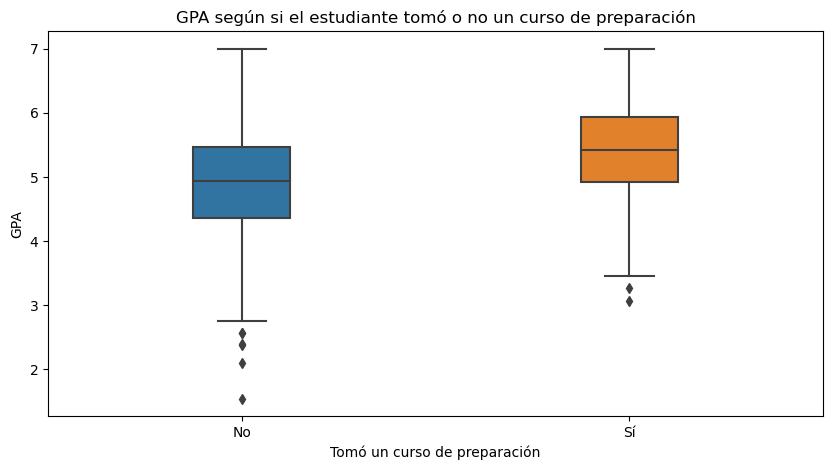

In [235]:
test_course_data = df_grades[["test preparation course", "GPA"]]
test_course_data["test preparation course"] = test_course_data["test preparation course"].map(
    {"none": "No", "completed": "Sí"}
)

fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=test_course_data,
            x="test preparation course",
            y="GPA",
            width=.25,
            ax=ax)

ax.set_title("GPA según si el estudiante tomó o no un curso de preparación")
ax.set_xlabel("Tomó un curso de preparación")
ax.set_ylabel("GPA")

fig.show()

En el gráfico anterior es posible observar una leve diferencia en el rendimiento promedio en las tres materias (GPA) dependiendo de si tomaron el curso de preparación o no, en este caso, el rendimiento es mayor para aquellos que sí lo tomaron.

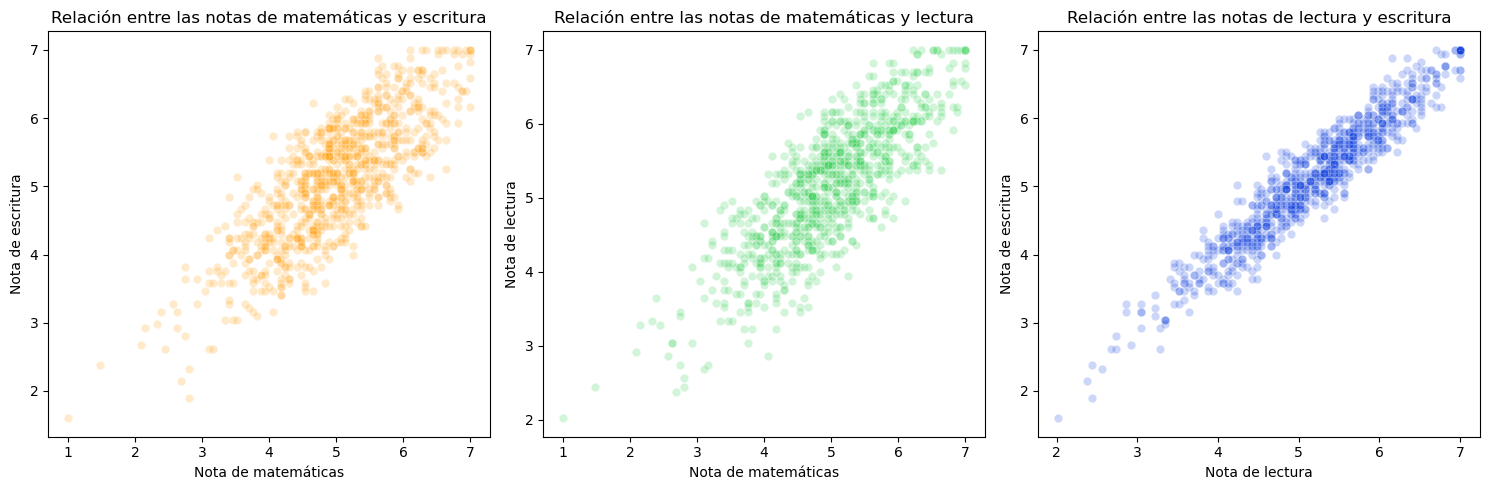

In [250]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(data=df_grades,
                x="math score",
                y="writing score",
                alpha=.2,
                color="#ff9900",
                ax=ax0)

sns.scatterplot(data=df_grades,
                x="math score",
                y="reading score",
                alpha=.2,
                color="#22cc44",
                ax=ax1)

sns.scatterplot(data=df_grades,
                x="reading score",
                y="writing score",
                alpha=.2,
                color="#0033dd",
                ax=ax2)

ax0.set_title("Relación entre las notas de matemáticas y escritura")
ax0.set_xlabel("Nota de matemáticas")
ax0.set_ylabel("Nota de escritura")

ax1.set_title("Relación entre las notas de matemáticas y lectura")
ax1.set_xlabel("Nota de matemáticas")
ax1.set_ylabel("Nota de lectura")

ax2.set_title("Relación entre las notas de lectura y escritura")
ax2.set_xlabel("Nota de lectura")
ax2.set_ylabel("Nota de escritura")

fig.tight_layout()
fig.show()

En el gráfico anterior exploramos las correlaciones entre los puntajes de las distintas materias. Es posible observar que existe una correlación positiva entre los puntajes de las distintas materias, siendo la mayor correlación (positiva) entre los puntajes de lectura y escritura (la tendencia es muy compacta), por otro lado, los puntajes entre matemáticas y las otras dos materias también presentan una correlación positiva, pero con una tendencia un poco más dispersa. Dado esto, es factible pensar en poder predecir el puntaje de una materia a partir de los puntajes de las otras materias.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>